### Extracting Tables from Double-Column PDFs: A step-by-step Guide Using Camelot

Extracting tables from double-column PDFs, a common format in academic research papers, poses unique challenges due to their complex layout. This article oultines a step by step guide of extracting tables out of a double-column pdf using the Camelot library for both bordered and borderless tables. 

As data and research engineers, part of our routine involves crafting pipelines to extract, transform, and load data from a multitude of sources to various destinations. Among these sources, double-column PDFs stand out due to their complex structures, necessitating bespoke solutions.


Other than providing research evidence and conclusive information, academic articles are also a secondary source of data critical for analytics and model training. The double-column format adds a layer of complexity to the table extraction process, a task for which most NLP tools are not ideally suited. This article is a guide to create a custom function tailored for extracting tables from double-column PDFs with ease. Camelot offering robust solutions for extracting both bordered and borderless tables.

Installing all the necessary packages and importing them for usage.
1. pip install camelot-py
2. pip install matplotlib

In [2]:
#2. We then import the libraries. 
import camelot
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt

Using this sample article as our focus, we're extracting all tables from pages 6 and 7. Begin by printing the document's structure to understand its layout. From the printed layout will assist us identify the approximate coordinates of the tables. These coordinates are essential for fine-tuning the **table_areas** parameter, allowing us to precisely target and extract the table data we're interested in.

C:\Users\pc\AppData\Local\Temp\ipykernel_19260\3874161894.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='text').show()


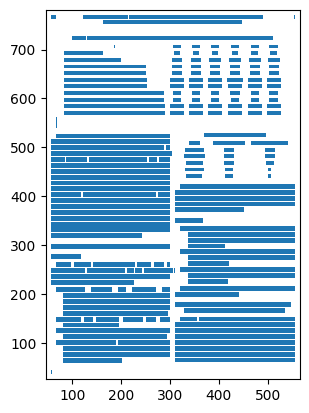

In [3]:
#3. Sampling page 6 layout
#Identify the page
pdf_path = '10.5923.j.ijee.20180802.03.pdf' #define file path

tables = camelot.read_pdf(pdf_path, pages='6', flavor='stream', strip_text=' .\n') #our table lacks clear grid lines

# Plot the page layout
camelot.plot(tables[0], kind='text').show()

To obtain table 2 in column 2 of page 6 print layout above, table_areas = [x1,y1,x2,y2] is estimated as ; table_areas = ['310,510,520,430'].

Next, test the Camelot library to gauge its accuracy in extracting the table using the specified table area. This step highlights the complexity of the process, as it requires identifying the table area for each page of interest.


In [4]:
#sampling page  - It perfectly prints out our table
tables = camelot.read_pdf(pdf_path, pages='6', flavor='stream', table_areas=['310,510,520,430'], strip_text=' .\n') #our table lacks clear grid lines
tables[0].df

,0,1,2
0,Sector,Energydemand(%),Electricitydemand(%)
1,Residential,6709,2424
2,Commercial,1335,1116
3,Transport,1186,646
4,Agriculture,725,0
5,Industrial,045,0


**Now that we are sure that our table area is perdfect, we will go ahead and create a function to return the results for page 6 and 7.**

In [5]:
#defining function
def get_tables(file_path, pages):
    extract_tables = []
    
    for detail in pages:
        page = detail['page']
        table_area = [detail.get('table_area', [])]
        columns = [detail.get('columns', [])]
        
        if table_area:
            tables = camelot.read_pdf(file_path, pages=str(page), flavor='stream', table_area=table_area, strip_text ='.\n')
        else:
            tables = camelot.read_pdf(pdf_path, pages=str(page), flavor='stream',compress=True, strip_text=' .\n')
        for table in tables:
            extract_tables.append(table.df)
    return extract_tables

In [6]:
#Executing the function
# Example usage:
file_path = '10.5923.j.ijee.20180802.03.pdf'


pages = [
    { 'page': 6,  'table_area': '310,510,520,430'},
    {'page': 7, 'table_area': '100,590,250,120'}
]

tables = get_tables(file_path, pages)
print(f"Found {len(tables)} table(s)")

Found 4 table(s)


According to our results, we've retrieved only 4 tables, although we expected to find 6. Next, we'll load each table, clean up any discrepancies, and save each one to a CSV file.

In [7]:
#result 1
tables[0]

,0,1,2,3,4,5,6
0,,"Supply, and Demand towards Achieving a Green E...",,,,,
1,Table 2,Uganda oil prospects (Source: Anticipation bas...,,,,,
2,,2015,2020,2025,2030,2035,2040
3,Barrels per day (“000’s),200,250,300,350,300,280
4,Barrels per 365 days (year) (“000’s,73000,91250,109500,127750,109500,102200
5,"Oil value per day, US 80 dollars per barrel (“...",16000,20000,24000,25000,24000,22400
6,"Oil value per day, US 60 dollars per barrel (“...",12000,15000,18000,21000,18000,16800
7,"Oil value per year, US 80 dollars per barrel (...",5840000,7300000,8760000,10220000,8760000,8176000
8,"Oil value per year, US 60 dollars per barrel (...",4380000,5475000,6570000,7665000,6570000,6132000
9,"Government revenue per day, US 80 dollars per ...",6400,8000,9600,11200,9600,8900


_Unfortunately, looping through the list of tables introduces a more complex process, making it easier to handle them on a case-by-case basis._


In [8]:
#Assign variable name to result 1 is first table on page 6
df = tables[0]

# Adjust the row and column indexes as needed
cleaned_df = df.iloc[1:12, 0:6]

# Reset the index of the cleaned DataFrame
cleaned_df.reset_index(drop=True, inplace=True)
#cleaned_df

# Grab the first row for the header
new_header = cleaned_df.iloc[0]

# Set the header row as the df header
cleaned_df = cleaned_df[1:]
cleaned_df.columns = new_header
cleaned_df

,Table 2,"Uganda oil prospects (Source: Anticipation based on Economic policy research center (EPRC) Uganda report, 2016)",,,,
1,,2015,2020,2025,2030,2035
2,Barrels per day (“000’s),200,250,300,350,300
3,Barrels per 365 days (year) (“000’s,73000,91250,109500,127750,109500
4,"Oil value per day, US 80 dollars per barrel (“...",16000,20000,24000,25000,24000
5,"Oil value per day, US 60 dollars per barrel (“...",12000,15000,18000,21000,18000
6,"Oil value per year, US 80 dollars per barrel (...",5840000,7300000,8760000,10220000,8760000
7,"Oil value per year, US 60 dollars per barrel (...",4380000,5475000,6570000,7665000,6570000
8,"Government revenue per day, US 80 dollars per ...",6400,8000,9600,11200,9600
9,"Government revenue per day, US 60 dollars per ...",4800,6000,7200,8400,7200
10,"Government revenue per year, US 80 dollars per...",2336000,2920000,3504000,4088000,3504000


In [9]:
#result 2
tables[1]

,0,1,2,3,4,5
0,,,,,Table 3 Energy demand comparison,
1,,"From fig 4 below, the oil production rates per...",,,,
2,year coupled with the respective value o...,,,Sector,Energy demand (%),Electricity demand (%)
3,production and government revenue are pre...,,is,,,
4,,,,Residential,6709,2424
5,"evident that, during the years from 2015 to 20...",,,,,
6,,,,Commercial,1335,1116
7,of oil is almost,insignificant since between this,"time,",,,
8,,,,Transport,1186,646
9,"production has not yet begun, when production ...",,,,,


_As observed, table was extracted alongside other irrelevant text. Our function did not perform as well as the independent script did._

In [10]:
#sample 2 - We finally get it
df = tables[1]

cleaned_df = df.iloc[2:13, 3:6] # Adjust the row and column indexes as needed

# Reset the index of the cleaned DataFrame
cleaned_df.reset_index(drop=True, inplace=True)
#cleaned_df

# Grab the first row for the header
new_header = cleaned_df.iloc[0]

# Set the header row as the df header
cleaned_df = cleaned_df[1:]
cleaned_df.columns = new_header
cleaned_df

,Sector,Energy demand (%),Electricity demand (%)
1,,,
2,Residential,6709,2424
3,,,
4,Commercial,1335,1116
5,,,
6,Transport,1186,646
7,,,
8,Agriculture,725,0
9,,,
10,Industrial,045,0


_Finally; save table to csv file_

In [ ]:
cleaned_df.to_csv("table_5_6.csv", index= False)